# Capstone Project : Clasification Problem

**Overview**: The objective of the project is to develop a classification model that predicts which bank customers are likely to close their accounts. Additionally, the study aims to identify and analyze the key factors contributing to customer attrition.  



### Getting Started

I have sourced the data from Kaggle which they conducted as part of the playground series couple of years ago. (https://www.kaggle.com/competitions/playground-series-s4e1/data).



### Problem 1: Understanding the Data

To gain a better understanding of the data, Analysing the data and performing EDA.

In [1]:
# Problem stattemnet
#Task is to predict whether a customer continues with their account or closes it (e.g., churns)


### Problem 2: Read in the Data

Use pandas to read in the dataset `train.csv`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/train.csv', sep = ',')

In [5]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object
 5   Gender           165034 non-null  object
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64


Output variable (desired target):
 13  Exited           165034 non-null  int64
```



In [6]:
df.nunique()

,0
id,165034
CustomerId,23221
Surname,2797
CreditScore,457
Geography,3
Gender,2
Age,71
Tenure,11
Balance,30075
NumOfProducts,4


In [7]:
df['Geography'].unique()
#df['CreditScore'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Count of Null')

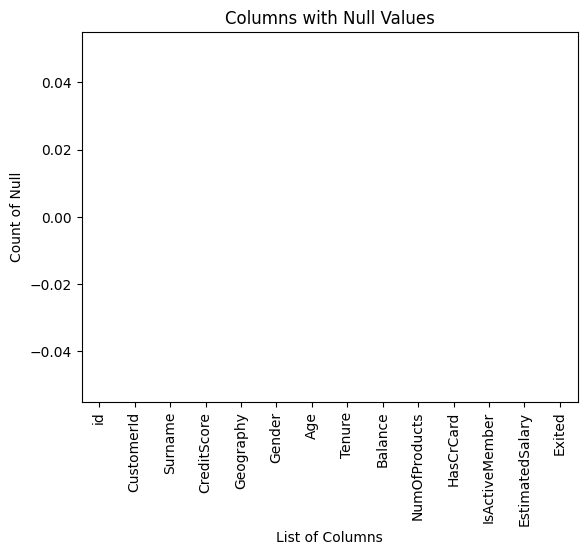

In [9]:
# Null values
#Graphical representation of null values
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Columns with Null Values')
plt.xlabel('List of Columns')
plt.ylabel('Count of Null')

In [9]:
df.describe([0.25,0.50,0.75, 0.85,0.90]).T # Numeric summary


,count,mean,std,min,25%,50%,75%,85%,90%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,1.402780e+05,148529.70,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,1.577819e+07,15790678.00,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,7.350000e+02,754.00,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,4.600000e+01,50.00,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,8.000000e+00,9.00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,1.320887e+05,139959.05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,2.000000e+00,2.00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.000000e+00,1.00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.000000e+00,1.00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,1.708296e+05,176843.53,199992.48


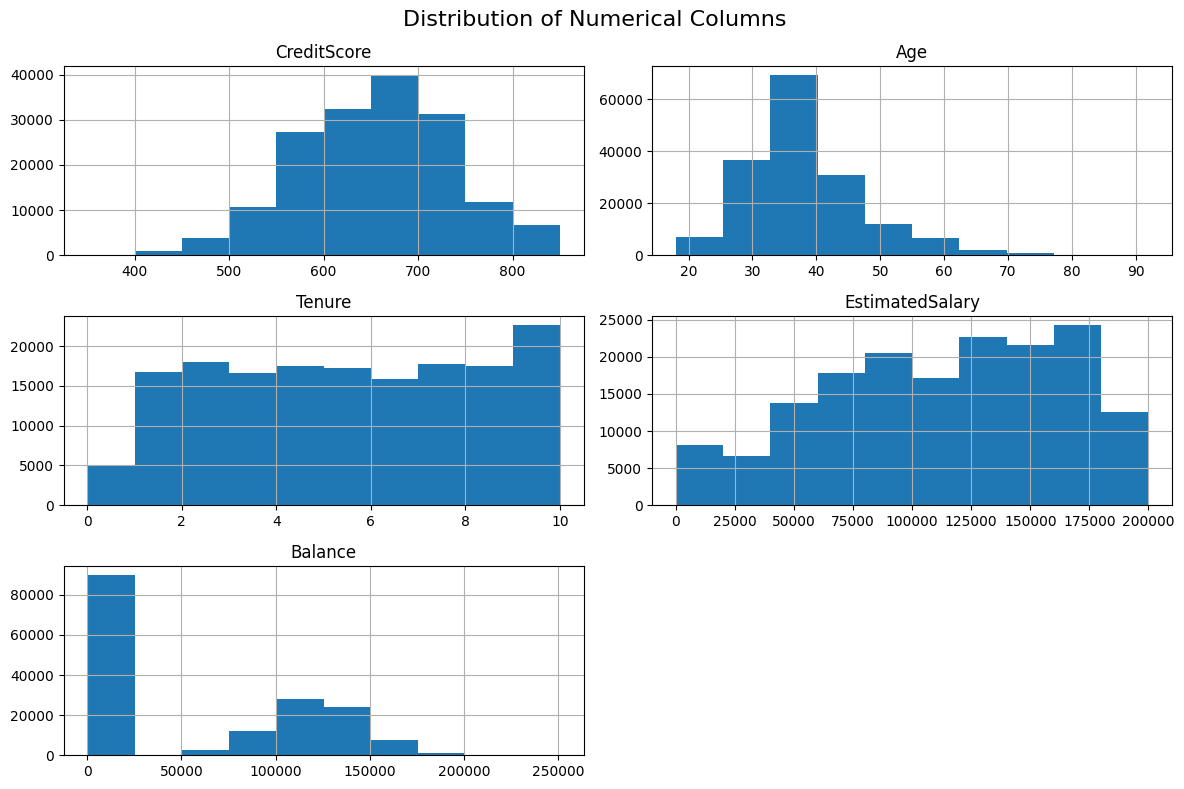

In [10]:
#Main Numerical Columns Histogram only few columns
num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
df[num_cols].hist(figsize = (12,8))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

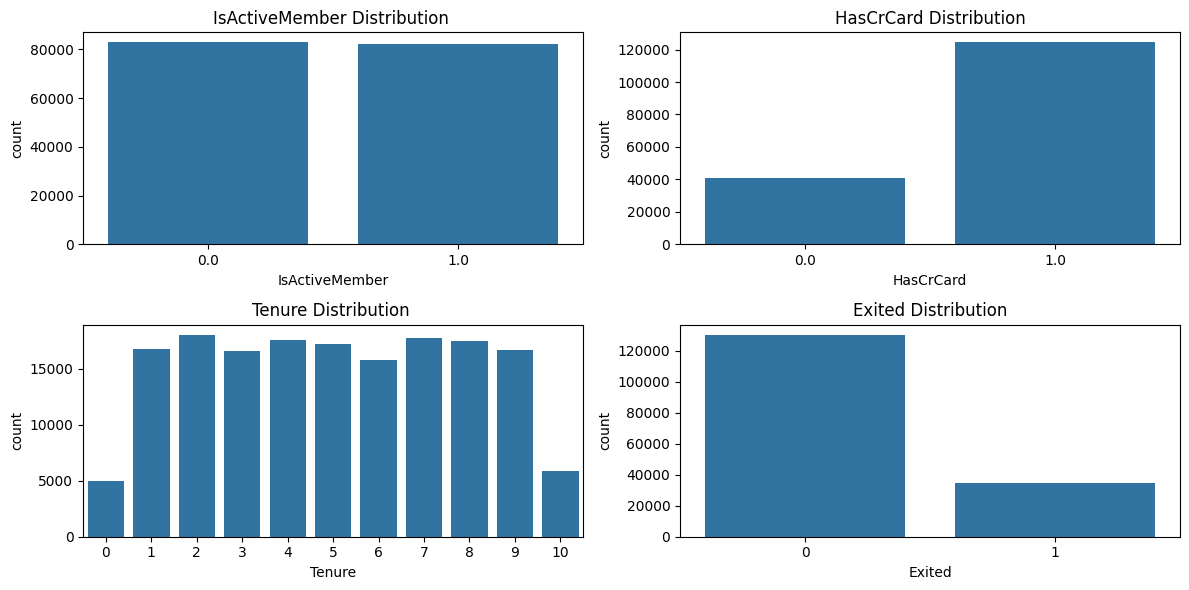

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.title('IsActiveMember Distribution ')
sns.countplot(x='IsActiveMember', data=df)

plt.subplot(2,2,2)
plt.title('HasCrCard Distribution')
sns.countplot(x='HasCrCard', data=df)

plt.subplot(2,2,3)
plt.title('Tenure Distribution ')
sns.countplot(x='Tenure', data=df)

plt.subplot(2,2,4)
plt.title('Exited Distribution')
sns.countplot(x='Exited', data=df)

plt.tight_layout()
plt.show()

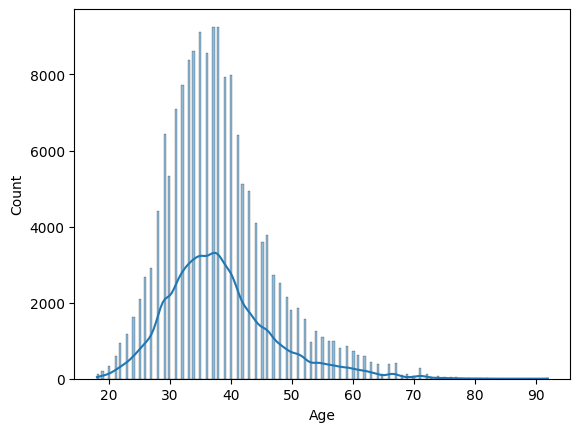

In [12]:
sns.histplot(x='Age', data=df, kde=True)     # Age distribution
plt.show()

In [ ]:
# Based on the above Data and below are the observations
#1. CreditScore ranges from 350 to 850. More than 75% of the customers score is 710 and less. 50% of the cusomer score is less than 660. ##### which is Normal
#2. Age -- Average Customer base is 38 Years. 75 % of the cusotomers are 42 and less than that. Max is 92 % . it is Right skewed
#3. Tenure -- 50% of the customer stays for 5 Years- Mean is 5 Years. Also more than 75% of the customer has tenure of 7 years or less. Max is 10.
    # Tenure is fairly evenly distributed between 1 to 9 years.
#4. EstimatedSalary -- 50% of the customer hold a salary of 117K . Average - 112K- Max of 200K. 75% of the cusomers salary is 155K . which is right skewed.
#5. Balance -- Max is 250K. But 50% of the customer has 0 balance.
#6. NumOfProducts - 75% of the customers have 2 products.
#7 Customers are almost evenly split between inactive and active members.


In [13]:
# Categorical summary
df.describe(include=['object']).T

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


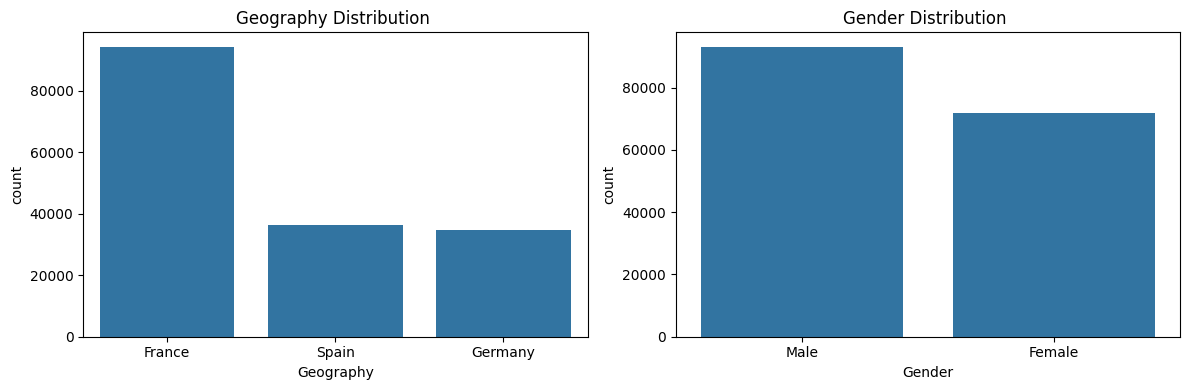

In [14]:
# Geography distribution
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Geography Distribution ')
sns.countplot(x='Geography', data=df)


plt.subplot(1,2,2)
plt.title('Gender Distribution ')
sns.countplot(x='Gender', data=df)
plt.tight_layout()
plt.show()


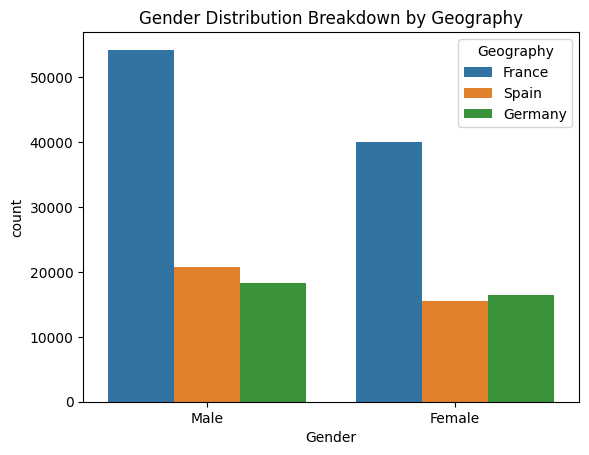

In [15]:
sns.countplot(x='Gender', data=df, hue = 'Geography')     # Male vs Female counts with Geography
plt.title('Gender Distribution Breakdown by Geography')
plt.show()

In [16]:
df['Geography'].groupby(df['Geography']).value_counts()/len(df)

,,count
Geography,Geography,
France,France,0.570882
Germany,Germany,0.209690
Spain,Spain,0.219428


In [17]:
df['Geography'].groupby(df['Gender']).value_counts()

Gender  Geography
Female  France       39976
        Germany      16388
        Spain        15520
Male    France       54239
        Spain        20693
        Germany      18218
Name: count, dtype: int64

In [18]:
df['Gender'].groupby(df['Gender']).value_counts()/len(df)

,,count
Gender,Gender,
Female,Female,0.435571
Male,Male,0.564429


In [43]:
#Majority of customers are from France (57%), followed by Spain (21%) and Germany (20%).
#The dataset has more male customers (56.4%) than female customers (43.5%).

In [19]:
# Chrun Analysis
print(df.groupby('Geography')[['Exited']].mean().round(2))
print(df.groupby('Gender')[['Exited']].mean().round(2))

           Exited
Geography        
France       0.17
Germany      0.38
Spain        0.17
        Exited
Gender        
Female    0.28
Male      0.16


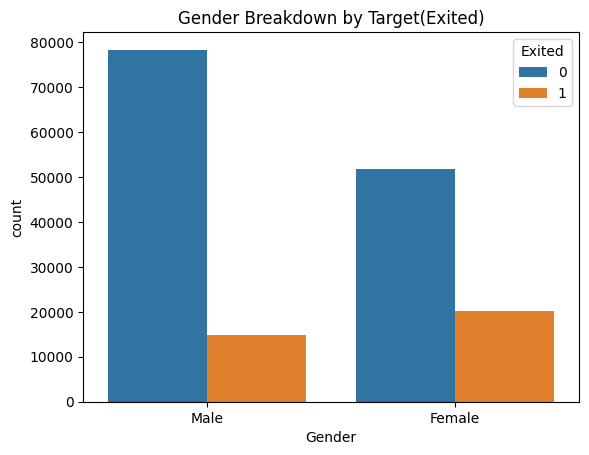

In [45]:
# Bivariate Analysis & plots
#num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']

sns.countplot(x='Gender', hue='Exited', data=df)          # Gender vs Exixted
plt.title('Gender Breakdown by Target(Exited)')
plt.show()

Text(0.5, 1.0, 'Age Breakdown by Target(Exited)')

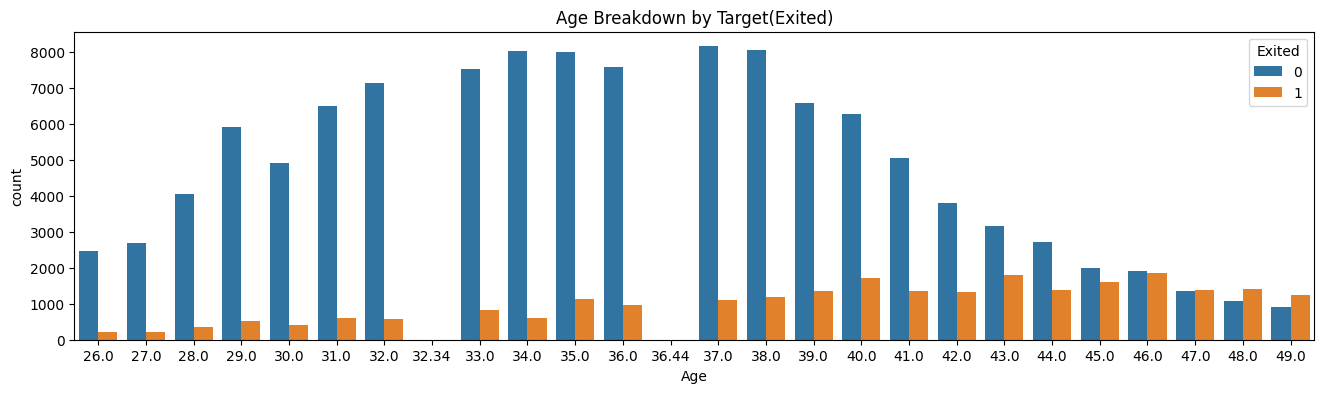

In [20]:
df_filter_G20 = df.query("Age > 25 and Age < 50")
plt.figure(figsize=(16, 4))
sns.countplot(x='Age', hue='Exited', data=df_filter_G20)          # Age vs Taeget (Exited)
plt.title('Age Breakdown by Target(Exited)')

#df.groupby('Age')[['Exited']].mean().round(2)/len(df)


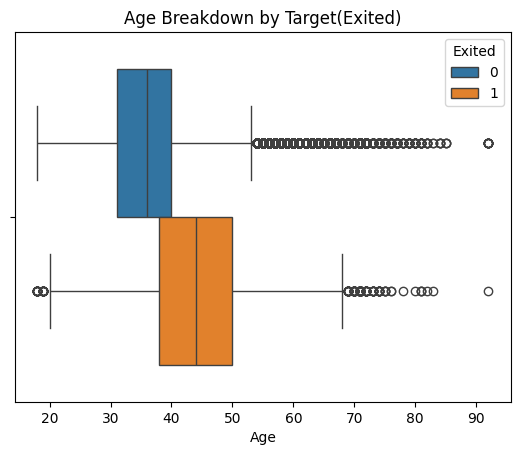

In [21]:
sns.boxplot(x='Age', hue='Exited', data=df)
plt.title('Age Breakdown by Target(Exited)')
plt.show()

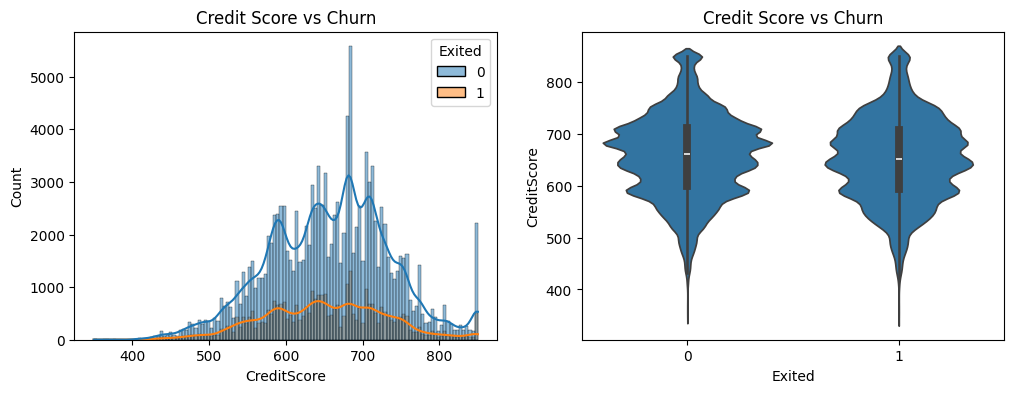

In [56]:

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='CreditScore', hue='Exited', fill=True, kde = True)
plt.title("Credit Score vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.show()

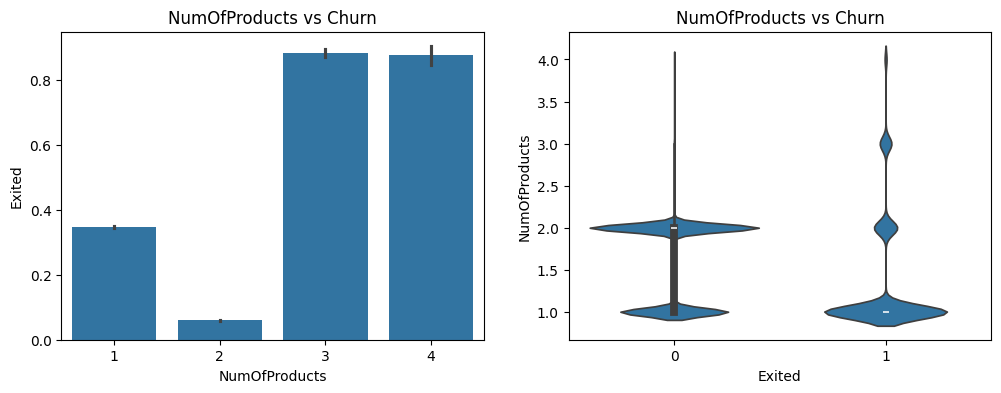

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.barplot(data=df, x='NumOfProducts', y='Exited')
plt.title("NumOfProducts vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='NumOfProducts', data=df)
plt.title("NumOfProducts vs Churn")
plt.show()

In [22]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index')


Exited,0,1
Gender,,
Female,0.720313,0.279687
Male,0.840945,0.159055


In [23]:
#Multivariate
pd.crosstab([df['Geography'] ,df['Gender']] , df['Exited'], normalize='index')

Exited                   0         1
Geography Gender                    
France    Female  0.774815  0.225185
          Male    0.878869  0.121131
Germany   Female  0.536490  0.463510
          Male    0.697113  0.302887
Spain     Female  0.774034  0.225966
          Male    0.868168  0.131832

Text(0.5, 1.0, 'Credit Score vs Churn')

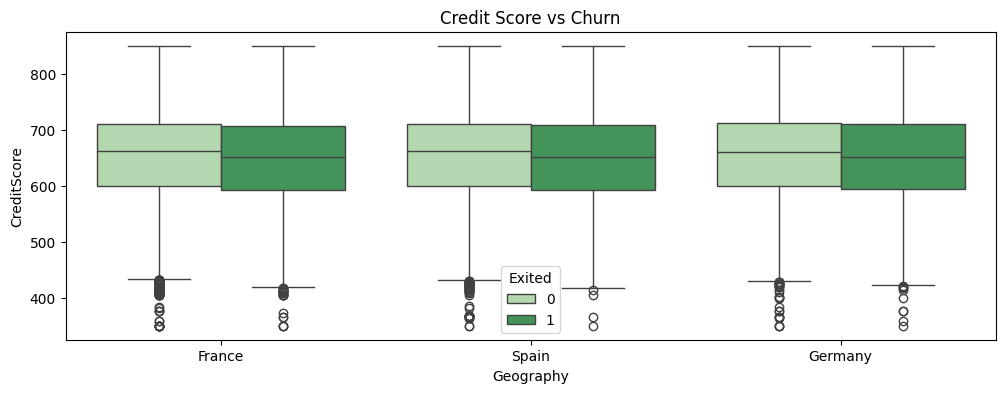

In [85]:

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Geography', y='CreditScore',hue = 'Exited', palette= 'Greens')
plt.title("Credit Score vs Churn")


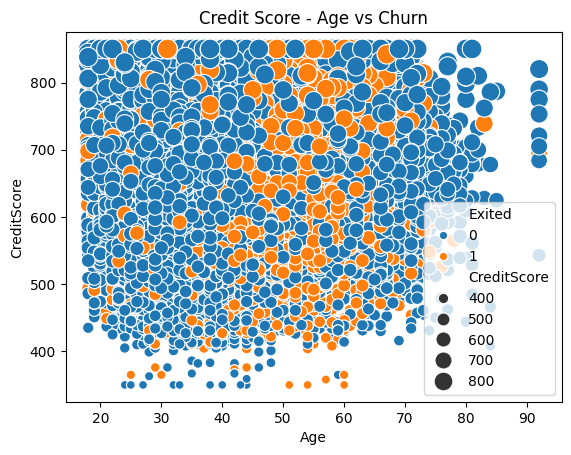

In [82]:
sns.scatterplot(x='Age', y='CreditScore', hue = 'Exited', data=df , size = 'CreditScore' , sizes = (40,200) )
plt.title("Credit Score - Age vs Churn")
plt.show()

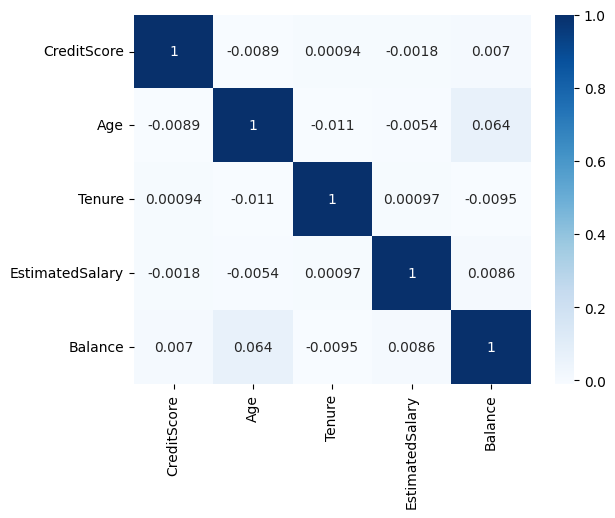

In [47]:
## Correlation matrix

num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.show()

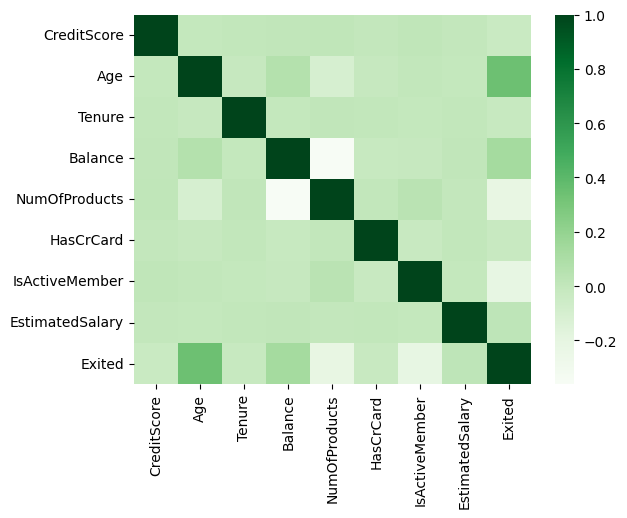

In [52]:
num_cols = ['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Exited']
sns.heatmap(df[num_cols].corr(),  cmap='Greens')  # Correlation matrix

plt.show()

In [91]:
#The dataset has more male customers (56.4%) than female customers (43.5%).
#Younger customer stayed while older customer exixted.
#Female Customer Exited by 27% compared to Male 15%
#when compared to the Georaphy
 #1 - Germany Female - 46% exited when compared to 22% for France & Spain
 #2-  Germany Male - 30 % Exited when compared to 12% and 13 % for France & spain
#Age and Balance are positively correlated (0.06)
#Age and CreditScore are negatively correlated
#Customers with 3 or more NumOfProducts exited than with 2 or less products.
# Credit score Range of all the geography is faily similar . Score betwen 600- 700 exited and stayed as well.
# custimer with more credit score exited by large

### Problem 4: Cleaning The data

After examining the data - EDA, Removing unwanted columns and making the data ready for Modeliing.

In [63]:
#looking at the Target column (Exited) earlier Data is not balanced.
df['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [ ]:
# we can do Oversampling or Undersampling to make the data balanced.
# but we will be loosing some majority data.
# SMOTE

In [86]:
X = df.drop(['id', 'CustomerId', 'Exited','Surname'], axis=1)
Y = df['Exited']

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using  the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

# Problem 6.1 :- Encoding section

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Encoding section

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions